# Práctico 3 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

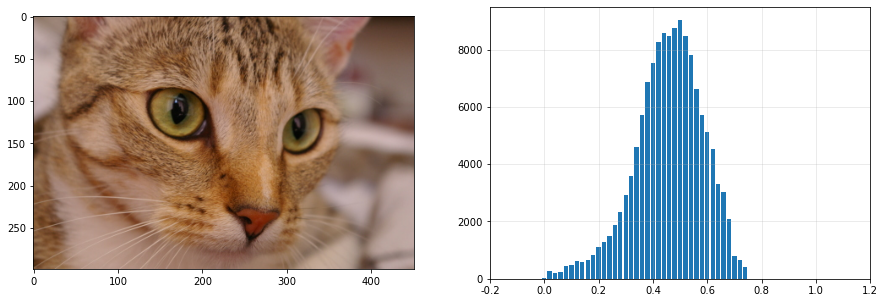

In [3]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img_gray = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
plot_hist(img_rgb, 50, axes[1])

# 1. Normalizar histograma al rango [0,1]

Definir una función que normalice el histograma de valores de la imagen al rango [0,1]. Si la imagen es RGB, debe normalizar el histograma de luminancias.

In [15]:
#DEFINO LA FUNCIÓN NORMALIZACIÓN(IMAGEN A NORMALIZAR)
#ESTA FUNCIÓN TRANSFORMA UNA IMAGEN RGB A YIQ, NORMALIZA LA LUMANCIA Y LUEGO LA TRASNFORMA A RGB

#defino la función
def normalizacion(img):

#paso la imagen a yiq
    i_yiq = rgb2yiq(img)

#veo el máximo y el minimo de la luminancia
    ymax = i_yiq[:,:,0].max()

    ymin = i_yiq[:,:,0].min()

    print("El valor mínimo y máximo son:")
    print(ymin)
    print(ymax)

    #inicializo la nueva matriz a partir de la dimención de img
    img_yiq2 = np.zeros(img.shape)
    #normalizo
    img_yiq2[:,:,0] = (img_yiq[:,:,0] - ymin)/(ymax-ymin)
    img_yiq2[:,:,1] = img_yiq[:,:,1]
    img_yiq2[:,:,2] = img_yiq[:,:,2]
    
    print("El valor minimo y máximo ahora son:")
    print(img_yiq2[:,:,0].min())
    print(img_yiq2[:,:,0].max())
    

    #imagen normalizada
    img_rgb2 = yiq2rgb(img_yiq2)

    #salida
    return img_rgb2

In [16]:
img_rgb_norm = normalizacion(img_rgb)

El valor mínimo y máximo son:
0.014792156862745098
0.7613882352941176
El valor minimo y máximo ahora son:
0.0
1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


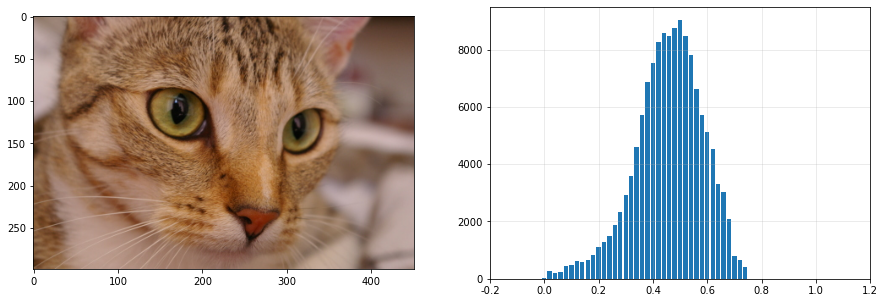

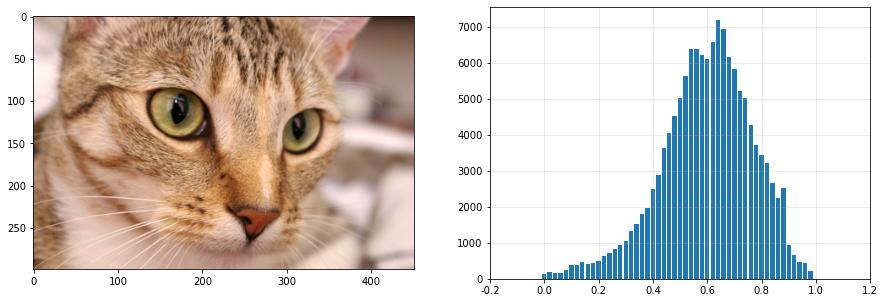

In [18]:
#GRAFICANDO
_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
plot_hist(img_rgb, 50, axes[1])

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb_norm, 'gray', vmin=0, vmax=1)
plot_hist(img_rgb_norm, 50, axes[1])

## 1.1 Normalizar histograma usando percentiles

Definir una función que normalice el histograma de valores de la imagen de modo que el pixel del percentil P valga 0 y el pixel del percentil 100-P valga 1. Los valores entre los percentiles 0 y P valdrán 0 y los valores entre los percentiles 100-P y 100 valdrán 1. Si la imagen es RGB, normalizar el histograma de luminancias.

NOTA: para calcular percentiles usar np.percentile()

In [25]:
def normalizacion_percentile(img, P):

    #paso la imagen a yiq
    img_yiq = rgb2yiq(img)

    #veo el percentil con P = 2

    pmax = np.percentile(img_yiq[:,:,0], 100-P)

    pmin = np.percentile(img_yiq[:,:,0], P)

    print("El valor mínimo y máximo del percentil son:")
    print(pmin)
    print(pmax)

    img_yiq3 = np.zeros(img.shape)
    img_yiq3[:,:,0] = (img_yiq[:,:,0] - pmin)/(pmax-pmin)
    img_yiq3[:,:,1] = img_yiq[:,:,1]
    img_yiq3[:,:,2] = img_yiq[:,:,2]
    
        #imagen normalizada
    img_rgb3 = yiq2rgb(img_yiq3)
    return img_rgb3


In [30]:
img_norm_per = normalizacion_percentile(img_rgb,5)

El valor mínimo y máximo del percentil son:
0.24009019607843135
0.6622196078431372


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


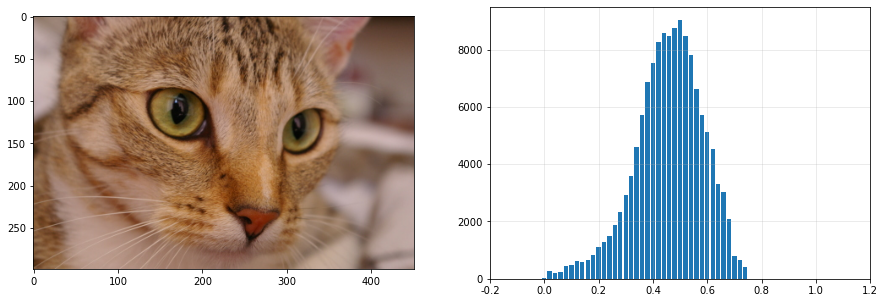

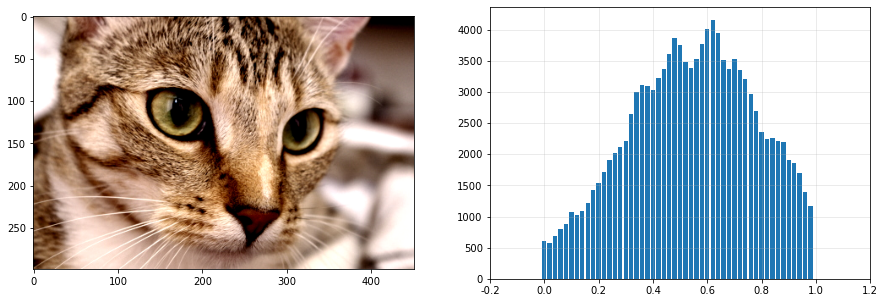

In [31]:
#GRAFICANDO
_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb, 'gray', vmin=0, vmax=1)
plot_hist(img_rgb, 50, axes[1])

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_norm_per, 'gray', vmin=0, vmax=1)
plot_hist(img_norm_per, 50, axes[1])


## 2. Corrección gamma

1. Definir una función que aplique la corrección gamma a una imagen. Si la imagen es RGB, debe aplicar la corrección sobre la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] (con min y max o con percentiles) y luego aplicar corrección gamma.


Como sugerencia, pasarle como parámetro un valor $\alpha$ de manera que $\gamma$ se calcule como:

$\gamma = 2^{-\alpha}$

De esta manera, cuando $\alpha=1 \rightarrow \gamma=1/2$, y cuando $\alpha=-1 \rightarrow \gamma=2$. Entonces, para $\alpha>0$ la luminosidad aumenta y para $\alpha<0$ disminuye.

In [59]:
#Utilizo la imagen ya normalizada en el #1:

def corr_gamma(alpha,img):

    gamma = 2 ** (-alpha)

    #paso la imagen a yiq
    img_yiq = rgb2yiq(img)
    
    img_yiq2 = np.zeros(img.shape)
    img_yiq2[:,:,0] = ((img_yiq[:,:,0]) **gamma)
    img_yiq2[:,:,1] = img_yiq[:,:,1]
    img_yiq2[:,:,2] = img_yiq[:,:,2]
    
    img_rgb3 = yiq2rgb(img_yiq3)/255
    
    return img_yiq2


In [60]:
img_corr_gamma = corr_gamma(-10, img_rgb_norm)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


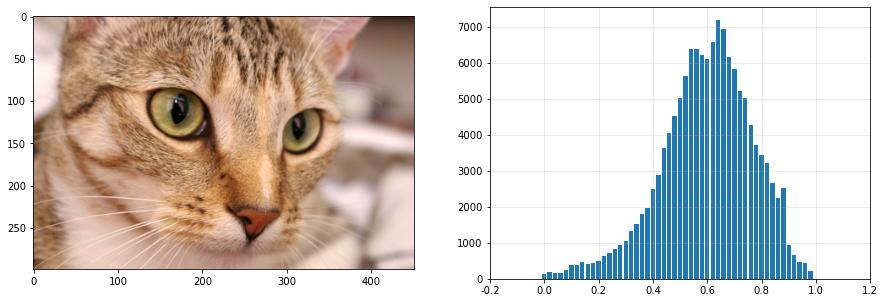

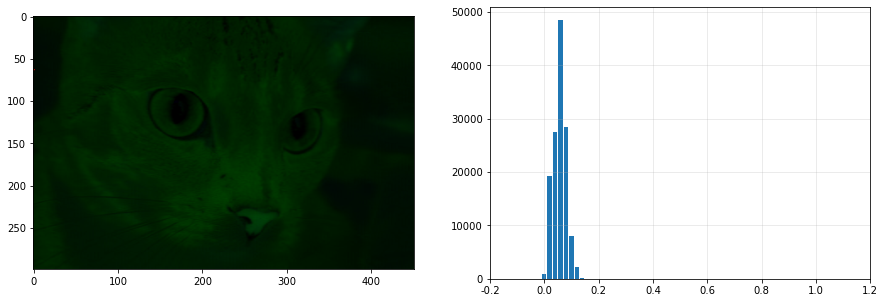

In [61]:
#GRAFICANDO
_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb_norm, 'gray', vmin=0, vmax=1)
plot_hist(img_rgb_norm, 50, axes[1])

_, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_corr_gamma, 'gray', vmin=0, vmax=1)
plot_hist(img_corr_gamma, 50, axes[1])

# 3. Modificación del histograma por una función definida a tramos

1. Definir una función que tome una imagen y dos arreglos $x$ e $y$ que definan una función no-lineal en el rango $0\leq x,y\leq 1$ y aplique la función a la intensidad de los pixeles de la imagen. Si la imagen es RGB debe aplicar la función a la luminosidad de la imagen.
2. Normalizar la imagen al rango [0,1] y luego aplicar corrección gamma.

Ayuda: La función np.interp() puede facilitarle la tarea

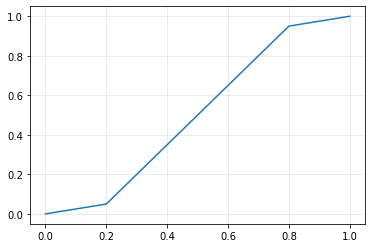

In [15]:
x = np.array([0, 0.2,  0.8,  1])
y = np.array([0, 0.05, 0.95, 1])

plt.plot(x, y)
plt.grid(alpha=0.3)

# 4. Uniformalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución uniforme. 
2. Normalizar el histograma al rango [0,1] y uniformalizar su distribución

# 5. Normalización del histograma

1. Definir una función que tome una imagen y haga que su histograma de intensidades tenga una distribución normal. 
2. Normalizar el histograma al rango [0,1] y normalizar su distribución.

In [21]:
from scipy.stats import norm

norm.cdf(0.5)

0.3520653267642995